<a href="https://colab.research.google.com/github/srijita1406/Machine-Learning-Projects/blob/main/Predicting_customer_satisfaction_of_an_airline_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
rs = 64

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV, KFold

# Estimators
from sklearn.linear_model import LogisticRegression,Perceptron,SGDClassifier
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

# Metrics
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.metrics import ConfusionMatrixDisplay, classification_report


In [10]:
# from google.colab import drive
# drive.mount('/content/gdrive/', force_remount=True)

In [11]:

# data = pd.read_csv(f'/content/{dataset}.csv')
data = pd.read_csv('v4.csv')

In [12]:
data.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction
0,0.217949,0.033926,0.2,1.0,0.2,0.25,0.6,0.2,0.75,0.6,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.653846,0.123183,0.4,0.8,0.4,0.75,0.6,0.4,0.50,0.6,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.179487,0.521607,0.6,0.8,0.6,1.00,0.8,0.6,0.75,0.8,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.448718,0.136511,1.0,0.8,0.8,0.75,0.8,0.2,1.00,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.487179,0.134491,0.4,0.6,0.6,0.50,0.4,0.4,0.25,0.4,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                20718 non-null  float64
 1   Flight Distance                    20718 non-null  float64
 2   Inflight wifi service              20718 non-null  float64
 3   Departure/Arrival time convenient  20718 non-null  float64
 4   Ease of Online booking             20718 non-null  float64
 5   Gate location                      20718 non-null  float64
 6   Food and drink                     20718 non-null  float64
 7   Online boarding                    20718 non-null  float64
 8   Seat comfort                       20718 non-null  float64
 9   Inflight entertainment             20718 non-null  float64
 10  On-board service                   20718 non-null  float64
 11  Leg room service                   20718 non-null  flo

In [14]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [15]:
y.value_counts()

0.0    11819
1.0     8899
Name: satisfaction, dtype: int64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 64)

# print(X_train.shape)
#print(X_test.shape)
print(y_train.shape)
#print(y_test.shape)

(16574,)


In [17]:
logistic = LogisticRegression(solver='sag', 
                              tol=1e-3, 
                              max_iter=100, 
                              random_state =64)
logistic.fit(X_train, y_train)

y_pred = logistic.predict(X_test)

recall_score(y_test,y_pred)

0.8205849268841395

In [18]:
clf = Perceptron(random_state=64,fit_intercept=True, warm_start=False) 
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8455598455598455

In [19]:
clf.intercept_

array([-11.])

In [20]:
logistic_sgd = SGDClassifier(loss='log_loss',
                        penalty='l2',
                        max_iter=10,
                        warm_start=False,
                        eta0=0.01,
                        alpha=0.001,
                        learning_rate='constant',
                        random_state=64)

logistic_sgd.fit(X_train,y_train)

SGDClassifier(alpha=0.001, eta0=0.01, learning_rate='constant', loss='log_loss',
              max_iter=10, random_state=64)

In [21]:
f1_score(y_test,  logistic_sgd.predict(X_test))

0.8323244552058111

In [22]:
knn_clf = KNeighborsClassifier(metric = 'minkowski', p = 2)

gs_cv = GridSearchCV(knn_clf,
                  param_grid= {'n_neighbors':[1,3,7,11]},
                  scoring='accuracy',
                  cv=5)

gs_cv.fit(X_train,y_train)
gs_cv.best_params_

{'n_neighbors': 7}

In [23]:

dt_clf = DecisionTreeClassifier(random_state = 64)

params = {'criterion':['gini','entropy'],
          'splitter':['best','random'],
          'min_samples_leaf': [2,4,6,8,10],
          'max_depth':[3,4,5,6]}

# t=KFold(n_splits = 4, random_state = 64)
gscv = GridSearchCV(dt_clf, 
                    params,
                    cv= 4,)

gscv.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=64),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'splitter': ['best', 'random']})

In [24]:
y_pred = gscv.best_estimator_.predict(X_test)
precision_score(y_test,y_pred)

0.9288753799392098

In [25]:
gscv.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, random_state=64,
                       splitter='random')

In [26]:
gscv.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 10,
 'splitter': 'random'}

In [27]:
gscv.best_params_['max_depth']

6

In [28]:
gscv.best_params_['min_samples_leaf']

10

In [29]:
gscv.best_estimator_.tree_.node_count


107

In [30]:
n_estimators = range(5,11)

param_grid = {"n_estimators":n_estimators}

rf_gs = GridSearchCV(RandomForestClassifier(random_state = 64), 
                     param_grid = param_grid)
rf_gs.fit(X_train,y_train)

rf_gs.best_params_

{'n_estimators': 10}

In [31]:

params = {'n_estimators':[10,20,30],
          'learning_rate':[0.5,1,2]}
adc = AdaBoostClassifier(random_state = 64)
gscv_ab = GridSearchCV(adc,
                       params,
                       cv=5)

gscv_ab.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=64),
             param_grid={'learning_rate': [0.5, 1, 2],
                         'n_estimators': [10, 20, 30]})

In [34]:
gscv_ab.best_params_

{'learning_rate': 0.5, 'n_estimators': 30}

In [45]:
adc1= AdaBoostClassifier(learning_rate= 0.5, n_estimators=30,random_state = 64)

In [48]:
adc1.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.5, n_estimators=30, random_state=64)

In [49]:
y_pred7=adc1.predict(X_test)

In [52]:
precision_score(y_test,y_pred7)

0.9194285714285715

In [62]:
recall_score(y_test,y_pred7)

0.904949381327334

In [65]:
from sklearn.metrics import classification_report

In [71]:
print(classification_report(y_test, y_pred7))

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93      2366
         1.0       0.92      0.90      0.91      1778

    accuracy                           0.93      4144
   macro avg       0.92      0.92      0.92      4144
weighted avg       0.93      0.93      0.93      4144



In [32]:
cm = confusion_matrix(y_test, gscv_ab.best_estimator_.predict(X_test))
cm[0][1] + cm[1][0]

310

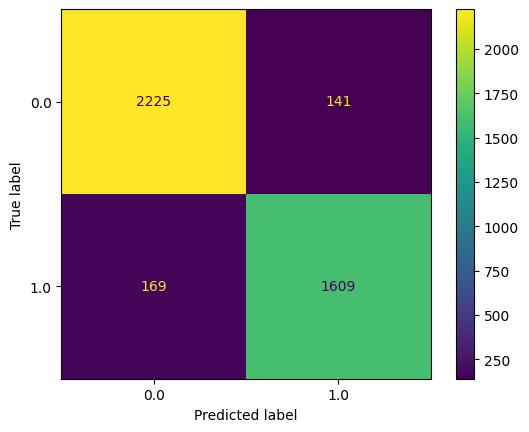

In [33]:
ConfusionMatrixDisplay.from_estimator(gscv_ab.best_estimator_, X_test,y_test)

In [35]:
param_grid = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

svc = SVC(random_state=64)

gs = GridSearchCV(svc, param_grid)

gs.fit(X_train, y_train)

gs.best_params_

{'C': 10, 'kernel': 'rbf'}

In [54]:
from xgboost import XGBClassifier

In [58]:
params = {'n_estimators':[10,20,30],
          'learning_rate':[0.5,1,2]}
xg = XGBClassifier(random_state = 64)
gscv_xg = GridSearchCV(xg,
                       params,
                       cv=5)

gscv_xg.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=64, ...),
             param_grid={'learning_rate': [0.5, 1, 2],
                         'n_estimators': [10, 20, 30]})

In [59]:
gscv_xg.best_params_

{'learning_rate': 0.5, 'n_estimators': 30}

In [60]:
y_pred8= gscv_xg.best_estimator_.predict(X_test)
precision_score(y_test,y_pred8)

0.968384074941452

In [61]:
recall_score(y_test,y_pred8)

0.9302587176602924

In [73]:
print(classification_report(y_test, y_pred8)),print(classification_report(y_test, y_pred7))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96      2366
         1.0       0.97      0.93      0.95      1778

    accuracy                           0.96      4144
   macro avg       0.96      0.95      0.96      4144
weighted avg       0.96      0.96      0.96      4144

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93      2366
         1.0       0.92      0.90      0.91      1778

    accuracy                           0.93      4144
   macro avg       0.92      0.92      0.92      4144
weighted avg       0.93      0.93      0.93      4144



(None, None)